#Importing Section

In [1]:
import pandas as pd
import numpy as np
import string
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly
from plotly.offline import iplot
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud , STOPWORDS
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split


#EDA And Text Mining 

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
punc = string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/AliElnafad/Author-Identification/master/spooky-author-identification/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/AliElnafad/Author-Identification/master/spooky-author-identification/test.csv')

In [4]:
print('shape of trian = ' + str(train.shape))
print('shape of test = ' + str(test.shape))

shape of trian = (19579, 3)
shape of test = (8392, 2)


In [5]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [6]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [8]:
data = [go.Pie(labels =train['author'].value_counts().keys() , values=train['author'].value_counts().values  )]
layout = go.Layout({'title' : 'Number Of Occurrences'})
fig = go.Figure(data = data , layout=layout)
fig.show()

##Text Mining 

Adding More Data :


*   Number Of Words
*   Number Of Chars
*   number of punctuations
*   number of Stop Words





In [9]:
train['Number Of Words'] = train['text'].apply(lambda x : len(x.split(' ')))
train['Number Of Chars'] = train['text'].apply(lambda x : len(x))
train['Number Of Punctuations'] = train['text'].apply(lambda x : len([k for k in  x if k in punc]))
train['Number Of Stop'] = train['text'].apply(lambda x : len([k for k in  x if k in STOPWORDS ]))

In [10]:
train

,id,text,author,Number Of Words,Number Of Chars,Number Of Punctuations,Number Of Stop
0,id26305,"This process, however, afforded me no means of...",EAP,41,231,7,35
1,id17569,It never once occurred to me that the fumbling...,HPL,14,71,1,11
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,200,5,32
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,206,4,40
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,174,4,27
...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,20,108,3,20
19575,id08973,The lids clenched themselves together as if in...,EAP,10,55,1,7
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,13,68,2,18
19577,id17513,"For an item of news like this, it strikes us i...",EAP,15,74,3,15


In [11]:
def plot_by_author (f1):
  fig = go.Figure(layout=go.Layout({'title':f1 + ' By Author'}))
  authors = ['EAP','HPL' , 'MWS']
  if f1 =='Number Of Words':
    limit = 80
  elif f1 == 'Number Of Chars':
    limit = 480
  elif f1 =='Number Of Punctuations':
    limit = 15
  elif f1 == 'Number Of Stop':
    limit = 80
  for author in authors:
    fig.add_trace(go.Violin(y= train[(train[f1]<limit) & (train['author'] == author)][f1] , box_visible =True , name =author))
  
  return fig

In [12]:
columns = ['Number Of Words' , 'Number Of Chars' , 'Number Of Punctuations','Number Of Stop']
for col in columns:
  plot_by_author(col).show()

From Above We Can Saying That : 

almost equal each other ,so it might not be helpful to use this as features



In [13]:
def plot_WordCloud(author):
  wc = WordCloud(background_color='black' , max_words=1000 , stopwords=STOPWORDS ,max_font_size= 50)
  wc.generate(' '.join(train[train['author'] == author]['text'].values))
  plt.figure(figsize=(16,13))
  plt.axis("off")
  plt.title('Word Cloud For ' + author)
  plt.imshow(wc, interpolation='bilinear')

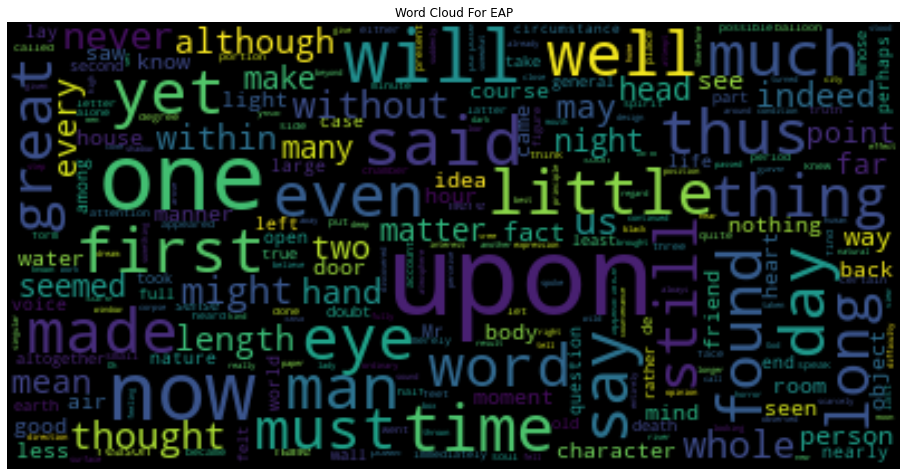

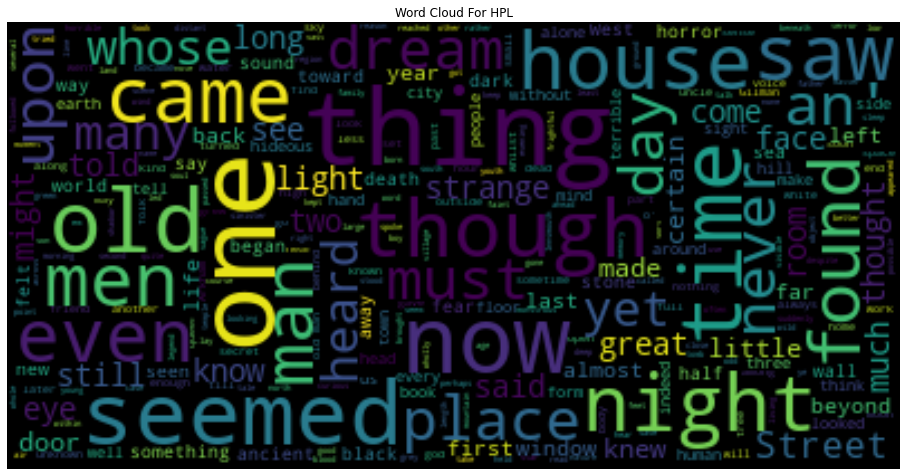

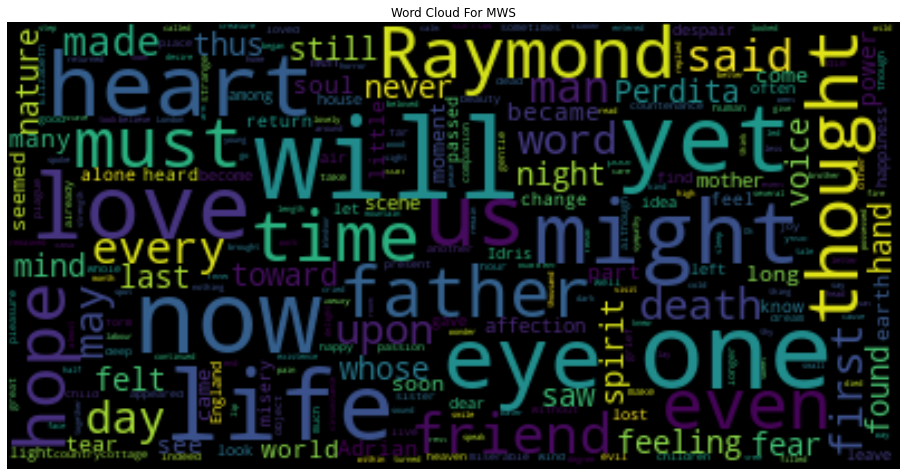

In [74]:
authors = ['EAP' , 'HPL','MWS']
for author in authors:
  plot_WordCloud(author)

Frome Above We Can Saying That : 


*   List item

*   List item
*   List item


*   List item



#Pre-Processing


*   Convering All Text To Lower Case

*   Tokeniztion

*   Removing Stop Words

*   Removing Punctuation

*   Removing Numbers

*   Stemming 

*   Encoding Label







In [15]:
def clean(text):
    text = text.lower()
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\d+', '', text)
    text = "".join([c for c in text if c not in string.punctuation])
    text = word_tokenize(text)
    stop_words = stopwords.words('english')
    text = [c for c in text if c not in stop_words]
    stemmer = PorterStemmer()
    reviews_stem = []
    for c in text:
        stem_word = stemmer.stem(c)
        reviews_stem.append(stem_word)

    return ' '.join(reviews_stem)

In [16]:
train['cleaned'] = train['text'].apply(clean)

In [17]:
from sklearn.preprocessing import LabelEncoder
y = train['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [18]:
authors = {'EAP':0 , 'HPL':1 , "MWS":2}
train['encode'] = train['author'].map(authors)


#Extracte Feature From Text (Bag Of Words & TF-IDF)

In [37]:
X = train['cleaned']
Y = train['encode']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X)
X_train_counts.shape, X_train.shape

((19579, 15422), (15663,))

In [39]:
from sklearn.feature_extraction.text import  TfidfTransformer
tf_transformer = TfidfTransformer()
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(19579, 15422)

##Dimensionality Reduction 

In [45]:
from sklearn.feature_selection import SelectPercentile , chi2

FeatureSelection = SelectPercentile(score_func = chi2, percentile=75)
X_data = FeatureSelection.fit_transform(X_train_tfidf, Y)
print(X_data.shape)

(19579, 11566)


##Spliting Dataset Into Train And Vaildation Data 


In [46]:
X_train, X_vaild, y_train, y_vaild = train_test_split(X_data, Y , test_size = .2 , random_state=42)
print('shape of X_train = ' +str(X_train.shape))
print('shape of X_vaild = ' +str(X_vaild.shape))

shape of X_train = (15663, 11566)
shape of X_vaild = (3916, 11566)


#Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=.01)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [71]:
y_pred = clf.predict(X_vaild)

##Evaluation Of Naive Bayes

In [72]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(y_vaild, y_pred))
print("Accuracy:", np.mean(y_pred == y_vaild))

Accuracy Score: 0.8419305413687436
Accuracy: 0.8419305413687436


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_vaild, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1570
           1       0.85      0.84      0.84      1071
           2       0.85      0.85      0.85      1275

    accuracy                           0.84      3916
   macro avg       0.84      0.84      0.84      3916
weighted avg       0.84      0.84      0.84      3916



#SGD Classifier with GridSearchCV

In [105]:
X_train_p, X_vaild_p, y_train_p, y_vaild_p = train_test_split(X, Y , test_size = .2 , random_state=42)
print('shape of X_train = ' +str(X_train_p.shape))
print('shape of X_vaild = ' +str(X_vaild_p.shape))

shape of X_train = (15663,)
shape of X_vaild = (3916,)


In [106]:
from sklearn.linear_model import SGDClassifier

In [107]:
from sklearn.pipeline import Pipeline

sgd_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

In [108]:

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet')}

In [109]:
from sklearn.model_selection import GridSearchCV

sgd_clf_gs = GridSearchCV(sgd_clf, parameters, n_jobs=-1)


In [111]:
sgd_clf_gs.fit(X_train_p, y_train_p)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        p

In [112]:
sgd_clf_gs.best_score_


0.8154889510949033

In [113]:
sgd_clf_gs.best_params_

{'clf__alpha': 1e-06,
 'clf__penalty': 'l2',
 'tfidf__norm': 'l1',
 'tfidf__use_idf': True,
 'vect__max_df': 0.5,
 'vect__max_features': None,
 'vect__ngram_range': (1, 2)}

GridSearchCV

##Evaluation Of SGD Classifier

In [117]:
y_pred = sgd_clf_gs.best_estimator_.predict(X_vaild_p)
print("Accuracy score:", accuracy_score(y_vaild_p, y_pred))

Accuracy score: 0.8156281920326864


In [120]:
print(classification_report(y_vaild_p, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1570
           1       0.82      0.79      0.80      1071
           2       0.78      0.88      0.82      1275

    accuracy                           0.82      3916
   macro avg       0.82      0.82      0.81      3916
weighted avg       0.82      0.82      0.82      3916

